# CUSTOMER SEGMENTATION USING KMEANS ALGORITHM

*To start with i'll have to load libraries and dependencies into my workbook*

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


importing the data from the excell file

In [4]:
df = pd.read_csv("Mall_Customers.xls")
# checkng if the dataset s loaded properly by displaying the first five rows of data
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In this context the id column is not relevant to our segmentation hence its not necessary to be included so I have to drop it

In [5]:
df.drop(["CustomerID"],axis=1,inplace=True)

In [6]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


finally the CustomerID column has been droped

plotting the ages frequency of the customers

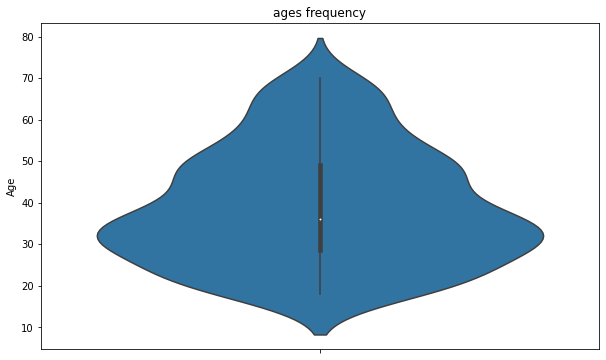

In [7]:
plt.figure(figsize=(10,6))
plt.title("ages frequency") #setting the title for our figure
sns.axes_style("dark")
sns.violinplot(y=df["Age"])
plt.show()

creating a box plot for spending score and anual income for comparison between the two

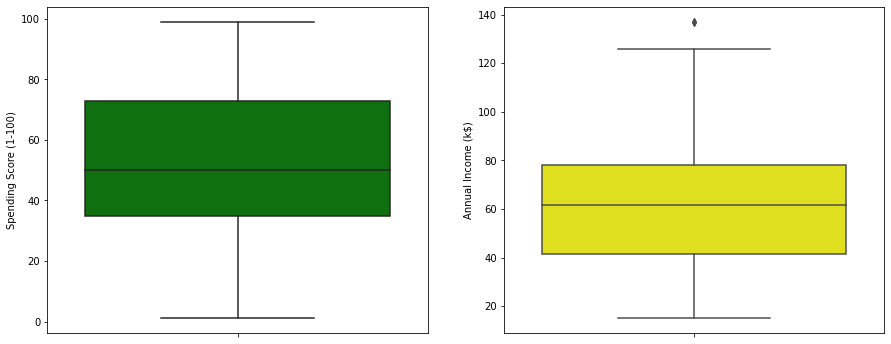

In [8]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"],color="green")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"],color="yellow")
plt.show()

from the diagram above you can see that the spending score is more than the annual income

i'll create bar graph to check on the gender distribution in the dataset

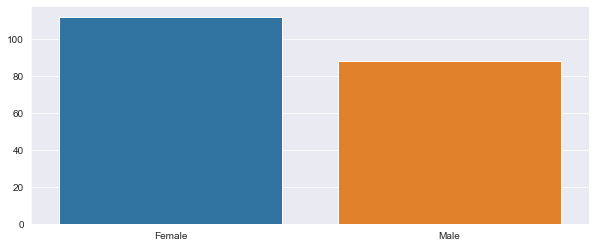

In [9]:
genders=df.Genre.value_counts() #getting the frequency of each gender
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y= genders.values)
plt.show()

from the above bar graphs you can see that there are more females(100+) than males(around 81) in the population

next ill have to check on the number of customers in each age group. To achieve this i'll use the bar plot again

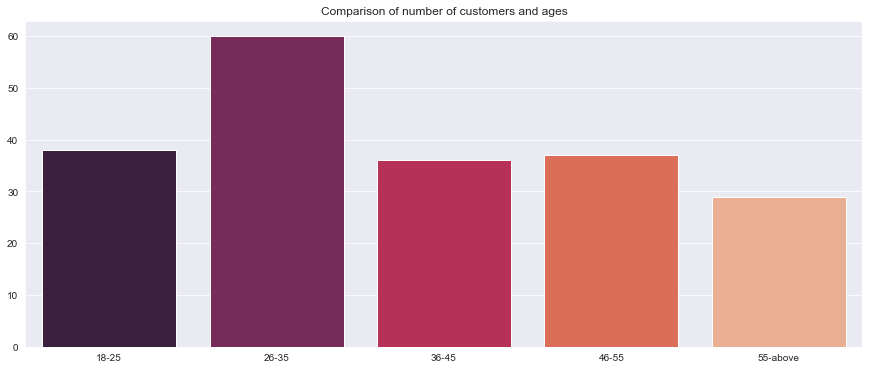

In [10]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >=18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >=26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >=36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >=46)]
above_55 = df.Age[(df.Age >=56)]
x = ["18-25","26-35","36-45","46-55","55-above"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(above_55.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=x,y=y, palette="rocket")
plt.title("Comparison of number of customers and ages")
plt.xlable=("Age")
plt.ylable=("Number of customers")
plt.show()

from the bar plot diagram above you can see that highest number of customers falls in the age bracket of 26-35  years of age

lets plot bar plot  to check the distribution of the numberd of customers and the spending scores

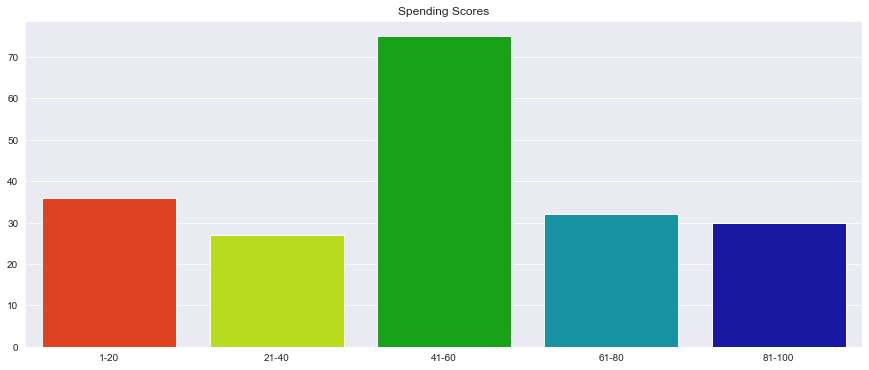

In [11]:
ss1_20 =df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=1) &(df["Spending Score (1-100)"]<=20) ]
ss21_40 =df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=21) &(df["Spending Score (1-100)"]<=40) ]
ss41_60 =df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=41) &(df["Spending Score (1-100)"]<=60) ]
ss61_80 =df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=61) &(df["Spending Score (1-100)"]<=80) ]
ss81_100 =df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=81) &(df["Spending Score (1-100)"]<=100) ]
ssx = ["1-20","21-40","41-60","61-80","81-100"]
ssy = [len(ss1_20.values),len(ss21_40.values),len(ss41_60.values),len(ss61_80.values),len(ss81_100.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=ssx,y=ssy,palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlable=("Score")
plt.ylable=("Number of customers posessing the score")
plt.show()


from the above bar plot diagram you can notice that majority of the customers have their spending score in the range 41-60


we can also plot the number of customers basing on their annual income

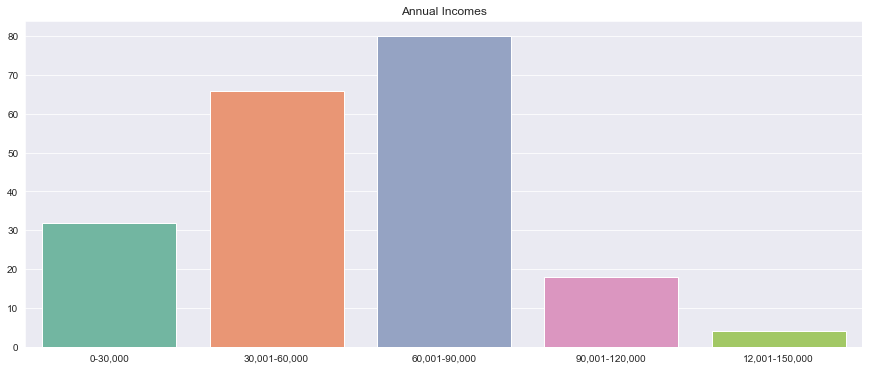

In [12]:
ss0_30 =df["Annual Income (k$)"][(df["Annual Income (k$)"]>=0) &(df["Annual Income (k$)"]<=30) ]
ss31_60 =df["Annual Income (k$)"][(df["Annual Income (k$)"]>=31) &(df["Annual Income (k$)"]<=60) ]
ss61_90 =df["Annual Income (k$)"][(df["Annual Income (k$)"]>=61) &(df["Annual Income (k$)"]<=90) ]
ss91_120 =df["Annual Income (k$)"][(df["Annual Income (k$)"]>=91) &(df["Annual Income (k$)"]<=120) ]
ss121_150 =df["Annual Income (k$)"][(df["Annual Income (k$)"]>=121) &(df["Annual Income (k$)"]<=150) ]
ssx = ["0-30,000","30,001-60,000","60,001-90,000","90,001-120,000","12,001-150,000"]
ssy = [len(ss0_30.values),len(ss31_60.values),len(ss61_90.values),len(ss91_120.values),len(ss121_150.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=ssx,y=ssy,palette="Set2")
plt.title("Annual Incomes")
plt.xlable=("Income")
plt.ylable=("Number of customers")
plt.show()

from the above bar plot diagram you can notice that the majority of customers have their anual incomes in the range off 60,000 to 90,000

using the cluster sum of squares technique we can plot it against the number of cluster values (K  values) to figure out the optimal k value

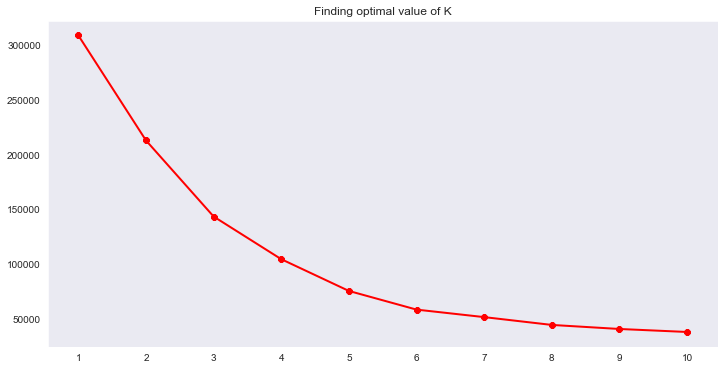

In [17]:
from sklearn.cluster import KMeans
wcss =[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init = "k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.title("Finding optimal value of K")
plt.xlable=("K values")
plt.xticks(np.arange(1,11,1))
plt.ylable=("Wcss")
plt.show()

Using the elbow method and finally ploting 3D plot to visualize the spending score of the customers with their annual income

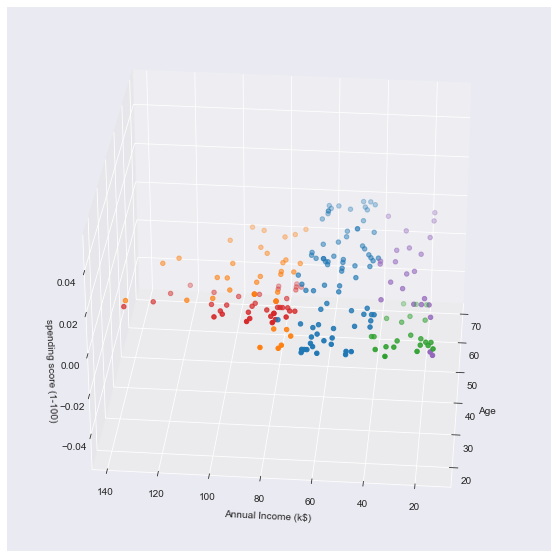

In [27]:
km = KMeans(n_clusters=5)
clusters=km.fit_predict(df.iloc[:,1:])
df["label"]=clusters
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fig =plt.figure(figsize=(20,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df.Age[df.label==0],df["Annual Income (k$)"][df.label==0])
ax.scatter(df.Age[df.label==1],df["Annual Income (k$)"][df.label==1])
ax.scatter(df.Age[df.label==2],df["Annual Income (k$)"][df.label==2])
ax.scatter(df.Age[df.label==3],df["Annual Income (k$)"][df.label==3])
ax.scatter(df.Age[df.label==4],df["Annual Income (k$)"][df.label==4])
ax.view_init(30,185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("spending score (1-100)")
plt.show()

from the above diagram the data points are separated into 5 classes which are represented in in different colors in 3D plot